In [3]:
from IPython.display import Image, display
from app.services.chat_service import ChatService

In [2]:
chat = await ChatService.create()

UnboundLocalError: cannot access local variable 'Neo4jService' where it is not associated with a value

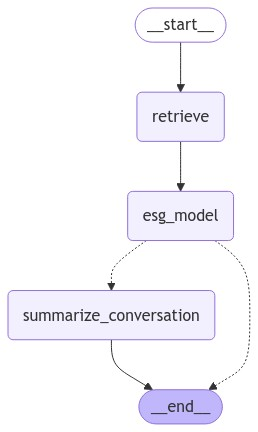

In [6]:
chat.graph
display(Image(chat.graph.get_graph().draw_mermaid_png()))

In [3]:
import datetime as datetime
print(datetime.datetime.now())

2025-05-21 23:24:00.861648


In [2]:
import requests
import time

url = "http://127.0.0.1:5050/api/v1/graph/uploadfile" # สมมติว่าคุณใช้ port 5050 ตามที่ app/main.py กำหนด

files = [
    ('files', ('789_03 Property_SET ESG Metrics full (1).pdf', open('./pdf/789_03 Property_SET ESG Metrics full (1).pdf', 'rb'), 'application/pdf'))
]
print("Uploading files...")
start = time.time()
response = requests.post(url, files=files) # ลองเอา timeout ออกไปก่อน หรือตั้งให้นานมากๆ
end = time.time()
print("Time taken to upload files: ", end-start)

print("Status Code:", response.status_code)
print("Response Headers:", response.headers)
print("Response Text (content):", response.text) # ดูว่าเนื้อหาเป็นอะไร

# หลังจากดู response.text แล้ว ถ้าคิดว่าเป็น JSON ค่อยลองเรียก .json()
# try:
#     print("JSON Response:", response.json())
# except requests.exceptions.JSONDecodeError as e:
#     print("Failed to decode JSON:", e)
#     print("As mentioned, the response text was:", response.text)

Uploading files...
Time taken to upload files:  73.96132159233093
Status Code: 200
Response Headers: {'date': 'Thu, 22 May 2025 08:15:25 GMT', 'server': 'uvicorn', 'content-length': '123', 'content-type': 'application/json'}
Response Text (content): {"status":"Success","message":"Files processed successfully and Question AI generation triggered.","service_response":null}


In [1]:
import os
import cohere
from dotenv import load_dotenv

# โหลด Environment Variables จากไฟล์ .env (ถ้าคุณใช้)
load_dotenv()

COHERE_API_KEY = os.getenv("COHERE_API_KEY")

if not COHERE_API_KEY:
    print("Error: ไม่พบ COHERE_API_KEY ใน Environment Variables")
    exit()

# Initialize Cohere client
try:
    # สำหรับ cohere SDK version ใหม่ๆ (ปกติจะใช้แบบนี้)
    co = cohere.Client(COHERE_API_KEY)
    # หมายเหตุ: ถ้าเป็น SDK version เก่ามากๆ อาจจะเป็น cohere.Client(api_key=COHERE_API_KEY)
    print("Cohere client initialized successfully.")
except Exception as e:
    print(f"Error initializing Cohere client: {e}")
    exit()

sample_texts = [
    "นี่คือข้อความทดสอบภาษาไทยสำหรับการสร้าง Embedding",
    "Hello from your Cohere API test script!"
]
# Model ที่คุณใช้ใน neo4j_service.py คือ 'embed-v4.0'
# หรือลองใช้ model อื่นที่รองรับหลายภาษา เช่น 'embed-multilingual-v3.0' เพื่อทดสอบ
# ตรวจสอบชื่อ Model ที่ถูกต้องจากเอกสารของ Cohere อีกครั้ง
model_name = os.getenv("COHERE_EMBEDDING_MODEL", "embed-v4.0") # ดึงมาจาก Env หรือ Hardcode

print(f"\nAttempting to get embeddings for {len(sample_texts)} texts using model '{model_name}'...")
print(f"Sample texts: {sample_texts}")

try:
    response = co.embed(
        texts=sample_texts,
        model=model_name,
        input_type="search_document" # ประเภท Input สำหรับการค้นหาเอกสารทั่วไป
                                     # อาจจะเป็น "search_query", "classification", "clustering" ขึ้นอยู่กับการใช้งาน
    )
    embeddings = response.embeddings
    print(f"\nSuccessfully retrieved {len(embeddings)} embeddings.")
    if embeddings:
        print(f"Dimension of the first embedding: {len(embeddings[0])}")
        # print("First 5 dimensions of the first embedding:", embeddings[0][:5])
    print("\nCohere API test successful! Your API key and connection are working.")

except cohere.CohereAPIError as e:
    print(f"\nCohere API Error occurred:")
    print(f"  Error Type: {type(e).__name__}")
    print(f"  Message: {e.message if hasattr(e, 'message') else str(e)}")
    if hasattr(e, 'http_status'):
        print(f"  HTTP Status Code: {e.http_status}")
    if hasattr(e, 'headers'):
        print(f"  Headers: {e.headers}")
    # บางครั้ง error details อาจจะอยู่ใน e.body หรือ e.response
    # print(f"  Body: {e.body if hasattr(e, 'body') else 'N/A'}")

except Exception as e:
    print(f"\nAn unexpected error occurred: {type(e).__name__} - {e}")

Cohere client initialized successfully.

Attempting to get embeddings for 2 texts using model 'embed-v4.0'...
Sample texts: ['นี่คือข้อความทดสอบภาษาไทยสำหรับการสร้าง Embedding', 'Hello from your Cohere API test script!']

Successfully retrieved 2 embeddings.
Dimension of the first embedding: 1536

Cohere API test successful! Your API key and connection are working.


In [ ]:
import requests

# Endpoint URL
url = "http://127.0.0.1:5050/api/v1/chat/"

# List of ESG questions
esg_questions = [
    "Describe your factory's quantitative and qualitative targets for greenhouse gas (GHG) emission reductions. Detail the specific strategies and initiatives implemented in the past year, including investments in renewable energy, energy efficiency upgrades, or carbon offsetting programs, and report on the measured reductions achieved.",
]

# Store responses
responses = []

# Posting each question to the endpoint
for question in esg_questions:
    payload = {
        "thread_id": "5",
        "question": question,
        # "prompt": "No matter what is asked, always answer: 'I will get back to you'"
    }
    try:
        response = requests.post(url, json=payload)
        if response.status_code == 200:
            responses.append(response.json())
            print(response.json())
        else:
            responses.append({"error": f"Failed with status code {response.status_code}"})
    except Exception as e:
        print(f"error: {e}")
        responses.append({"error": str(e)})

# responses


{'messages': [{'content': "Describe your factory's quantitative and qualitative targets for greenhouse gas (GHG) emission reductions. Detail the specific strategies and initiatives implemented in the past year, including investments in renewable energy, energy efficiency upgrades, or carbon offsetting programs, and report on the measured reductions achieved.", 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': '65cd3357-becf-4c6a-93dc-c9f477a47d9b', 'example': False}, {'content': "I am sorry, but this document does not contain specific details about a factory's quantitative and qualitative targets for greenhouse gas (GHG) emission reductions, the specific strategies and initiatives implemented in the past year, including investments in renewable energy, energy efficiency upgrades, or carbon offsetting programs, and the measured reductions achieved.", 'additional_kwargs': {}, 'response_metadata': {'prompt_feedback': {'block_reason': 0, 'safety_ratings

In [8]:
import subprocess
import shutil

def check_command_availability(command_name):
    """Checks if a command is available in the system PATH."""
    if shutil.which(command_name):
        print(f"'{command_name}' IS FOUND in the system PATH.")
        return True
    else:
        print(f"'{command_name}' IS NOT FOUND in the system PATH.")
        return False

def try_run_poppler_command(command_with_args):
    """Tries to run a Poppler command and captures output/error."""
    command_name = command_with_args[0]
    if not check_command_availability(command_name):
        print(f"Skipping execution of '{command_name}' as it's not found in PATH.")
        return False
        
    print(f"\nAttempting to run: {' '.join(command_with_args)}")
    try:
        # ใช้ shell=True ด้วยความระมัดระวัง และเฉพาะกับ command ที่คุณควบคุมได้
        # สำหรับ Poppler utilities ที่ไม่มี space ในชื่อ และ -v argument มันค่อนข้างปลอดภัย
        result = subprocess.run(command_with_args, capture_output=True, text=True, shell=True, check=False, timeout=10)
        print(f"Return code: {result.returncode}")
        if result.stdout:
            print(f"Stdout:\n{result.stdout.strip()}")
        if result.stderr:
            # Poppler's -v often prints to stderr, this is normal
            print(f"Stderr:\n{result.stderr.strip()}")
        
        if result.returncode == 0 or "poppler version" in result.stderr.lower() or "pdftotext version" in result.stderr.lower() or "pdfinfo version" in result.stderr.lower():
            print(f"'{command_name}' seems to be working correctly.")
            return True
        else:
            print(f"'{command_name}' executed but might have an issue (check output).")
            return False
            
    except FileNotFoundError:
        print(f"Error: Command '{command_name}' not found. Make sure Poppler is installed and its bin directory is in PATH.")
        return False
    except subprocess.TimeoutExpired:
        print(f"Error: Command '{command_name}' timed out.")
        return False
    except Exception as e:
        print(f"An unexpected error occurred while running '{command_name}': {e}")
        import traceback
        traceback.print_exc()
        return False

if __name__ == "__main__":
    print("--- Poppler Check Script ---")
    
    # ตรวจสอบคำสั่งหลักๆ ของ Poppler ที่ unstructured อาจจะใช้
    # (unstructured อาจจะไม่ได้เรียกใช้ผ่าน command line โดยตรงเสมอไป แต่เป็นการทดสอบว่า Poppler utilities พร้อมใช้งาน)
    
    print("\n--- Checking pdftotext ---")
    # pdftotext -v จะแสดงเวอร์ชันไปที่ stderr
    try_run_poppler_command(["pdftotext", "-v"])

    print("\n--- Checking pdfinfo ---")
    # pdfinfo -v จะแสดงเวอร์ชันไปที่ stderr
    try_run_poppler_command(["pdfinfo", "-v"])
    
    # เพิ่มเติม: ลองกับไฟล์ PDF จริง (ถ้ามีไฟล์ PDF ง่ายๆ ไว้ทดสอบ)
    # test_pdf_path = "./abc/your_simple_test.pdf" # <--- สร้างไฟล์ PDF ง่ายๆ มาวางไว้ที่นี่
    # output_txt_path = "./abc/test_output.txt"
    # if os.path.exists(test_pdf_path):
    #     print(f"\n--- Trying pdftotext on a sample PDF: {test_pdf_path} ---")
    #     try_run_poppler_command(["pdftotext", test_pdf_path, output_txt_path])
    #     if os.path.exists(output_txt_path):
    #         print(f"Output text file created: {output_txt_path}. Check its content.")
    #     else:
    #         print(f"Failed to create output text file from PDF.")
    # else:
    #     print(f"\nSample PDF for pdftotext test not found at: {test_pdf_path}")

    print("\n--- Check Complete ---")
    print("Review the output above. If commands are not found, Poppler is not in PATH or not installed correctly.")
    print("If commands execute but show errors (other than version info in stderr), there might be an issue with the Poppler installation itself.")

--- Poppler Check Script ---

--- Checking pdftotext ---
'pdftotext' IS FOUND in the system PATH.

Attempting to run: pdftotext -v
Return code: 0
Stderr:
pdftotext version 20.10.0
Copyright 2005-2020 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011 Glyph & Cog, LLC
'pdftotext' seems to be working correctly.

--- Checking pdfinfo ---
'pdfinfo' IS FOUND in the system PATH.

Attempting to run: pdfinfo -v
Return code: 0
Stderr:
pdfinfo version 20.10.0
Copyright 2005-2020 The Poppler Developers - http://poppler.freedesktop.org
Copyright 1996-2011 Glyph & Cog, LLC
'pdfinfo' seems to be working correctly.

--- Check Complete ---
Review the output above. If commands are not found, Poppler is not in PATH or not installed correctly.
If commands execute but show errors (other than version info in stderr), there might be an issue with the Poppler installation itself.


In [1]:
# test_loader.py
from langchain_unstructured import UnstructuredLoader
import io
import traceback

pdf_file_path = './abc/Wanwisa Sakchaiyan__CL.pdf' # ตรวจสอบว่า path นี้ถูกต้องจาก root ของโปรเจกต์

print(f"--- Testing UnstructuredLoader with: {pdf_file_path} ---")
try:
    print("\nAttempting to load from file_path with strategy='fast'...")
    # ลองใช้ strategy="fast" ก่อน เพราะอาจจะใช้ dependency น้อยกว่า
    loader_from_path = UnstructuredLoader(file_path=pdf_file_path, strategy="fast")
    docs_from_path = loader_from_path.load()
    print(f"Successfully loaded from path. Number of docs: {len(docs_from_path)}")
    if docs_from_path:
        print(f"First doc (first 200 chars): {docs_from_path[0].page_content[:200]}")
except Exception as e_path:
    print(f"Error loading from path: {e_path}")
    traceback.print_exc()
print("-" * 30)
try:
    print("\nAttempting to load from BytesIO with strategy='fast' (mimicking service)...")
    with open(pdf_file_path, "rb") as f:
        file_content = f.read()
    file_like_object = io.BytesIO(file_content)

    loader_from_bytesio = UnstructuredLoader(file=file_like_object, metadata_filename="test.pdf", strategy="fast")
    docs_from_bytesio = loader_from_bytesio.load()
    print(f"Successfully loaded from BytesIO. Number of docs: {len(docs_from_bytesio)}")
    if docs_from_bytesio:
        print(f"First doc (first 200 chars): {docs_from_bytesio[0].page_content[:200]}")
except Exception as e_bytesio:
    print(f"Error loading from BytesIO: {e_bytesio}")
    traceback.print_exc()

--- Testing UnstructuredLoader with: ./abc/Wanwisa Sakchaiyan__CL.pdf ---

Attempting to load from file_path with strategy='fast'...


INFO: pikepdf C++ to Python logger bridge initialized


Successfully loaded from path. Number of docs: 8
First doc (first 200 chars): Wanwisa Sakchaiyan 99, Moo 9, Nong Bua Subdistrict Ban Phaeo District, Samut Sakhon, 74120 061-519-0500 | wisa.pv@gmail.com
------------------------------

Attempting to load from BytesIO with strategy='fast' (mimicking service)...
Successfully loaded from BytesIO. Number of docs: 8
First doc (first 200 chars): Wanwisa Sakchaiyan 99, Moo 9, Nong Bua Subdistrict Ban Phaeo District, Samut Sakhon, 74120 061-519-0500 | wisa.pv@gmail.com


In [1]:
# minimal_test.py
from fastapi import FastAPI
import uvicorn
import sys
import os
import importlib.util # For checking module spec

# --- Logging at startup (before ONNX import) ---
print("--- Minimal App Startup ---")
print(f"Python Executable: {sys.executable}")
print("sys.path at minimal app startup:")
for p in sys.path:
    print(p)
print(f"Current Working Directory: {os.getcwd()}")
print(f"PATH Environment Variable: {os.environ.get('PATH')}")
print("--- End Minimal App Startup Info ---")

app = FastAPI()

onnx_import_error = None
onnx_version = None
onnx_file_location = None
onnx_providers = None
pybind_import_error = None

try:
    print("\n--- Attempting to import onnxruntime in Minimal App ---")
    import onnxruntime
    onnx_version = onnxruntime.__version__
    onnx_file_location = onnxruntime.__file__
    onnx_providers = onnxruntime.get_available_providers()
    print(f"ONNX Runtime Version: {onnx_version}")
    print(f"ONNX Runtime Location: {onnx_file_location}")
    print(f"ONNX Available Providers: {onnx_providers}")

    print("\n--- Attempting to import onnxruntime_pybind11_state in Minimal App ---")
    from onnxruntime.capi import onnxruntime_pybind11_state
    print("onnxruntime_pybind11_state imported successfully in Minimal App!")

except ImportError as e_imp:
    print(f"ImportError in Minimal App: {e_imp}")
    onnx_import_error = str(e_imp)
    if "onnxruntime_pybind11_state" in str(e_imp):
        pybind_import_error = str(e_imp)
except Exception as e_exc:
    print(f"Unexpected error during import in Minimal App: {e_exc}")
    onnx_import_error = str(e_exc)


@app.get("/")
async def root():
    return {
        "message": "Minimal FastAPI app for ONNX Runtime test",
        "python_executable": sys.executable,
        "onnx_version": onnx_version,
        "onnx_location": onnx_file_location,
        "onnx_providers": onnx_providers,
        "onnx_import_error": onnx_import_error,
        "pybind_import_error": pybind_import_error
    }

if __name__ == "__main__":
    # Run this file directly (python minimal_test.py)
    # Ensure your .venv is activated in the terminal you use.
    uvicorn.run(app, host="127.0.0.1", port=8000)

--- Minimal App Startup ---
Python Executable: c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.myvenv_py312\Scripts\python.exe
sys.path at minimal app startup:
C:\Users\User\AppData\Local\Programs\Python\Python312\python312.zip
C:\Users\User\AppData\Local\Programs\Python\Python312\DLLs
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib
C:\Users\User\AppData\Local\Programs\Python\Python312
c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.myvenv_py312

c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.myvenv_py312\Lib\site-packages
c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.myvenv_py312\Lib\site-packages\win32
c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.myvenv_py312\Lib\site-packages\win32\lib
c:\Use

RuntimeError: asyncio.run() cannot be called from a running event loop

In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")
# คุณสามารถตรวจสอบได้ด้วยว่า PyTorch สามารถใช้ CUDA ได้หรือไม่ (ถ้าคุณต้องการ GPU support)
# print(f"CUDA available: {torch.cuda.is_available()}")
# print(f"CUDA version: {torch.version.cuda}") # ถ้า CUDA available

PyTorch version: 2.2.2+cpu


In [9]:
import sys
print("--- sys.path ---")
for p in sys.path:
    print(p)
print("--- end sys.path ---")

print("\n--- Attempting to import onnxruntime ---")
try:
    import onnxruntime
    print("ONNX Runtime imported successfully!")
    print(f"Version: {onnxruntime.__version__}")
    print(f" Tämä on onnxruntime-kirjaston sijainti: {onnxruntime.__file__}") # Location of onnxruntime
    print(f"Käytettävissä olevat suorituskyvyn tarjoajat: {onnxruntime.get_available_providers()}") # Available execution providers
except ImportError as e:
    print(f"ImportError during onnxruntime import: {e}")
except Exception as e:
    print(f"An unexpected error occurred during onnxruntime import: {e}")

print("\n--- Attempting to import onnxruntime_pybind11_state ---")
try:
    from onnxruntime.capi import onnxruntime_pybind11_state
    print("onnxruntime_pybind11_state imported successfully!")
except ImportError as e:
    print(f"ImportError during onnxruntime_pybind11_state import: {e}")
except Exception as e:
    print(f"An unexpected error occurred while importing onnxruntime_pybind11_state: {e}")

--- sys.path ---
C:\Users\User\AppData\Local\Programs\Python\Python312\python312.zip
C:\Users\User\AppData\Local\Programs\Python\Python312\DLLs
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib
C:\Users\User\AppData\Local\Programs\Python\Python312
c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.venv

c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.venv\Lib\site-packages
c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.venv\Lib\site-packages\win32
c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.venv\Lib\site-packages\win32\lib
c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.venv\Lib\site-packages\Pythonwin
--- end sys.path ---

--- Attempting to import onnxruntime ---
ONNX Runtime imported successfully!
V

In [10]:
import os
import sys
print("--- Uvicorn Application PATH Environment Variable ---")
print(os.environ.get('PATH'))
print("--- End PATH ---")
# ... (โค้ด logging sys.path และ onnxruntime import ที่เคยแนะนำ) ...

--- Uvicorn Application PATH Environment Variable ---
c:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.venv\Scripts;C:\Users\User\Downloads\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\ESG-LLM-finetune-and-Graph-RAG-main\.venv\Scripts;C:\gurobi1101\win64\bin;C:\Program Files (x86)\VMware\VMware Player\bin\;C:\Program Files (x86)\Razer Chroma SDK\bin;C:\Program Files\Razer Chroma SDK\bin;C:\TDM-GCC-64\bin;C:\MinGW\bin;C:\Program Files (x86)\Razer\ChromaBroadcast\bin;C:\Program Files\Razer\ChromaBroadcast\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\110\Tools\Binn\;C:\Program Files (x86)\Microsoft SQL Server\120\Tools\Binn\;C:\Program Files\Microsoft SQL Server\120\Tools\Binn\;C:\Program Files\Microsoft SQL Server\120\DTS\Binn\;C:\Program Files (x86)\Windows Kits\8.1\Windows Performance Toolkit\;

In [ ]:
import requests
import time

url = "http://127.0.0.1:8000/api/v1/graph/uploadfile"

files = [
    ('files', ('DocA.pdf', open('pdf/0a114341-0e93-4a94-8327-e9254026920b.pdf', 'rb'), 'application/pdf')),
    ('files', ('789_03 Property_SET ESG Metrics full (1).pdf', open('./pdf/789_03 Property_SET ESG Metrics full (1).pdf', 'rb'), 'application/pdf')),
    ('files', ('T-VER-P-METH-13-08 Good practices in Paddy Rice Version 01_250967.pdf', open('./pdf/T-VER-P-METH-13-08 Good practices in Paddy Rice Version 01_250967.pdf', 'rb'), 'application/pdf')),
    ('files', ('T-VER-P-METH-13-06 Version 01_EN.pdf', open('./pdf/T-VER-P-METH-13-06 Version 01_EN.pdf', 'rb'), 'application/pdf')),
]
print("Uploading files...")
start = time.time()
response = requests.post(url, files=files)
end = time.time()
print("Time taken to upload files: ", end-start)
print(response.json())  # This will print the JSON response from the server

In [1]:
import magic
print(magic.from_buffer('hello world'))

data


In [ ]:
# Wait for installation to finish

In [ ]:
import onnxruntime
importing onnxruntime_pybind11_state
print(onnxruntime.__version__)

SyntaxError: invalid syntax (2128126973.py, line 2)

In [11]:
import os
import requests
import time

url = "http://127.0.0.1:5050/api/v1/graph/uploadfile/"
pdf_folder = 'abc'  # Folder containing PDF files
batch_size = 1  # Number of files to upload in each batch

# Get all PDF files from the folder
pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith('.pdf')]
pdf_files = pdf_files[:1]

# Process files in batches
for i in range(0, len(pdf_files), batch_size):
    # Prepare batch of files
    files = []
    for pdf_file in pdf_files[i:i + batch_size]:
        file_path = os.path.join(pdf_folder, pdf_file)
        files.append(('files', (pdf_file, open(file_path, 'rb'), 'application/pdf')))
    
    # Upload batch
    print(f"Uploading batch {i // batch_size + 1}...")
    start = time.time()
    response = requests.post(url, files=files)
    end = time.time()
    print("Time taken to upload batch: ", end - start)

    # Print response
    if response.status_code == 200:
        print("Batch upload successful:", response.json())
    else:
        print("Batch upload failed with status code:", response.status_code, response.text)

    # Close file objects to free resources
    for file_tuple in files:
        file_tuple[1][1].close()


Uploading batch 1...


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5050): Max retries exceeded with url: /api/v1/graph/uploadfile/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E162B04BC0>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [5]:
import sys
print(sys.path) # ดูว่า Python มองหา module จากที่ไหนบ้าง
try:
    import onnxruntime
    print("ONNX Runtime imported successfully!")
    print(f"Version: {onnxruntime.__version__}")
    # ลองเรียกฟังก์ชันพื้นฐาน (ถ้ามี)
    # print(onnxruntime.get_available_providers())
except ImportError as e:
    print(f"ImportError: {e}")
except Exception as e:
    print(f"An unexpected error occurred during import: {e}")

# ลอง import ส่วนที่ error โดยตรง (อาจจะไม่ใช่ public API แต่เพื่อทดสอบ)
try:
    from onnxruntime.capi import onnxruntime_pybind11_state
    print("onnxruntime_pybind11_state imported successfully!")
except ImportError as e:
    print(f"Failed to import onnxruntime_pybind11_state: {e}") # นี่คือ error ที่คุณเจอ
except Exception as e:
    print(f"An unexpected error occurred while importing onnxruntime_pybind11_state: {e}")

['C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python312', 'c:\\Users\\User\\Downloads\\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\\ESG-LLM-finetune-and-Graph-RAG-main\\.venv', '', 'c:\\Users\\User\\Downloads\\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\\ESG-LLM-finetune-and-Graph-RAG-main\\.venv\\Lib\\site-packages', 'c:\\Users\\User\\Downloads\\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\\ESG-LLM-finetune-and-Graph-RAG-main\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\User\\Downloads\\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\\ESG-LLM-finetune-and-Graph-RAG-main\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\Downloads\\ESG-LLM-finetune-and-Graph-RAG-mainesg (5)\\ESG-LLM-finetune-and-Graph-RAG-main\\.venv\\Lib\\site-packages\\Pythonwin']
ONNX Runtime 

In [ ]:
# I think it work now?

In [1]:
import requests

# Endpoint URL
url = "http://127.0.0.1:8000/api/v1/chat/"

# List of ESG questions
esg_questions = [
    "How does your organization measure and manage its carbon footprint?",
    # "What are your company’s long-term environmental goals?",
    # "How do you ensure sustainable sourcing for raw materials?",
    # "What policies does your company have to reduce waste production?",
    # "How are you minimizing water usage across your operations?",
    # "What diversity and inclusion initiatives are currently in place?",
    # "How does the organization support community development and social causes?",
    # "What steps does your company take to ensure fair labor practices?",
    # "How do you engage with employees to maintain high workplace satisfaction?",
    # "What are your policies on health and safety for employees?",
    # "What practices does your company have to maintain transparent corporate governance?",
    # "How does the board ensure compliance with ethical standards?",
    # "What is your policy on executive compensation?",
    # "How are ESG risks integrated into your overall risk management framework?",
    # "How do you ensure accountability at all levels within the company?",
    # "How many organizer in this project?",
    # "What does this data about?",
    # "How many node are there?",
    # "Summary all this in 100 word",
    # "Pick one file name for me"
]

# Store responses
responses = []

# Posting each question to the endpoint
for question in esg_questions:
    payload = {
        "thread_id": "99999",
        "question": question,
        # "prompt": "No matter what is asked, always answer: 'I will get back to you'"
    }
    try:
        response = requests.post(url, json=payload)
        if response.status_code == 200:
            responses.append(response.json())
            print(response.json())
        else:
            responses.append({"error": f"Failed with status code {response.status_code}"})
    except Exception as e:
        print(f"error: {e}")
        responses.append({"error": str(e)})

# responses


{'messages': [{'content': 'How does your organization measure and manage its carbon footprint?', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'human', 'name': None, 'id': 'aba9bc67-efb7-4764-a46d-ced0541c79ee', 'example': False}, {'content': 'The organization uses the FTSE ESG Ratings Model, which assesses companies based on three dimensions (Environment, Social, and Governance), 14 themes, and 300+ indicators, focusing on data transparency, materiality, outcome, and performance against targets.', 'additional_kwargs': {}, 'response_metadata': {'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, 'type': 'ai', 'name': None, 'id': 'run-a5c4a69f-0c24-4845-8deb-7fd34edee6ba-0', 'example': False, 'tool_calls': [], 'invalid_tool_calls': [], 'usage_metadata': {'input_tokens': 18294, 'output_tokens': 52, 'total_tokens': 18346, 'input_token_details': {'cache_read': 0}}}, {'content': 'What are your company’s long-term environm

In [19]:
import concurrent.futures

url = "http://127.0.0.1:8000/api/v1/chat/"

esg_questions = [
    "How does your organization measure and manage its carbon footprint?",
    "What are your company’s long-term environmental goals?",
    "How do you ensure sustainable sourcing for raw materials?",
    "What policies does your company have to reduce waste production?",
    "How are you minimizing water usage across your operations?",
    # "What diversity and inclusion initiatives are currently in place?",
    # "How does the organization support community development and social causes?",
    # "What steps does your company take to ensure fair labor practices?",
    # "How do you engage with employees to maintain high workplace satisfaction?",
    # "What are your policies on health and safety for employees?",
    # "What practices does your company have to maintain transparent corporate governance?",
    # "How does the board ensure compliance with ethical standards?",
    # "What is your policy on executive compensation?",
    # "How are ESG risks integrated into your overall risk management framework?",
    # "How do you ensure accountability at all levels within the company?",
    # "How many organizer in this project?",
    # "What does this data about?",
    # "How many node are there?",
    # "Summary all this in 100 word",
    # "Pick one file name for me"
]

def post_question(q):
    payload = {
        "thread_id": "99999",
        "question": q,
        # "prompt": "No matter what is asked, always answer: 'I will get back to you'"
    }
    try:
        resp = requests.post(url, json=payload)
        if resp.status_code == 200:
            return resp.json()
        else:
            return {"error": f"Failed with status code {resp.status_code}"}
    except Exception as e:
        return {"error": str(e)}

# Clear or reuse the 'responses' variable; here we reinitialize it
responses = []

with concurrent.futures.ThreadPoolExecutor() as executor:
    future_to_question = {executor.submit(post_question, q): q for q in esg_questions}
    for future in concurrent.futures.as_completed(future_to_question):
        result = future.result()
        responses.append(result)

In [ ]:
# oneQuestion = 10 sec
# fiveQuestion = 37.8 sec
# tenQuestion = 63.8 sec

In [16]:
responses[0]['messages'][-1]['content']

'The organization uses the FTSE ESG Ratings Model, which assesses companies based on three dimensions (Environment, Social, and Governance), 14 themes, and 300+ indicators, focusing on data transparency, materiality, outcome, and performance against targets.'

In [ ]:
import json

data = {
    "messages": [
        {
            "content": "How does your organization measure and manage its carbon footprint?",
            "additional_kwargs": {},
            "response_metadata": {},
            "type": "human",
            "name": None,
            "id": "7afe5575-4c0d-4afd-a6d1-e2bd5cad26b5",
            "example": False
        },
        {
            "content": "The organization uses the FTSE ESG Ratings Model, which considers three dimensions (Environment, Social, and Governance), 14 themes, and 300+ indicators to score each company's ESG operations and performance. The assessment focuses on data transparency, materiality, outcome, and performance, and is aligned with global standards.",
            "additional_kwargs": {},
            "response_metadata": {
                "prompt_feedback": {
                    "block_reason": 0,
                    "safety_ratings": []
                },
                "finish_reason": "STOP",
                "safety_ratings": []
            },
            "type": "ai",
            "name": None,
            "id": "run-772d555c-cae0-46d7-a194-42f3797c229c-0",
            "example": False,
            "tool_calls": [],
            "invalid_tool_calls": [],
            "usage_metadata": {
                "input_tokens": 18294,
                "output_tokens": 66,
                "total_tokens": 18360,
                "input_token_details": {
                    "cache_read": 0
                }
            }
        },
        {
            "content": "How does your organization measure and manage its carbon footprint?",
            "additional_kwargs": {},
            "response_metadata": {},
            "type": "human",
            "name": None,
            "id": "91f8762b-7151-40d4-b83c-0891ac100cd0",
            "example": False
        },
        {
            "content": "The organization uses the FTSE ESG Ratings Model, which considers three dimensions (Environment, Social, and Governance), 14 themes, and 300+ indicators to score each company's ESG operations and performance, focusing on data transparency, materiality, outcome, and performance, and aligned with global standards.",
            "additional_kwargs": {},
            "response_metadata": {
                "prompt_feedback": {
                    "block_reason": 0,
                    "safety_ratings": []
                },
                "finish_reason": "STOP",
                "safety_ratings": []
            },
            "type": "ai",
            "name": None,
            "id": "run-0aef109b-6479-492a-89cb-8748447b89ce-0",
            "example": False,
            "tool_calls": [],
            "invalid_tool_calls": [],
            "usage_metadata": {
                "input_tokens": 18371,
                "output_tokens": 64,
                "total_tokens": 18435,
                "input_token_details": {
                    "cache_read": 0
                }
            }
        }
    ]
}

print(json.dumps(data, indent=4))

In [4]:
import requests

delete_thread = "99999"

# Endpoint URL
url = f"http://127.0.0.1:8000/api/v1/chat/{delete_thread}"

try:
    response = requests.delete(url)
    if response.status_code == 200:
        print(response.json())
    else:
        print(f"Failed with status code {response.status_code}")
except Exception as e:
    print(f"error: {e}")
    responses.append({"error": str(e)})


{'detail': 'Messages for thread_id 99999 successfully deleted.'}
